# Analyzing COVID RNA Sequences in Python

### Introduction

In this project, I am going to download and analyze the data on RNA sequences of COVID in two of its major variants: Delta and Omicron.

RNA is a nucleic acid present in any living cell that has one strand consisting of various combinations of four nucleotides: uracil, cytosine, adenine, and guanine. RNA is the "source code" for COVID that enables the virus to enter the cell and replicate itself.

I'll be using the available data from NIH (National Institutes of Health), the federal government agency in the U.S. Because of its large size (184 MB) you can download from [here](https://drive.google.com/file/d/1S2ZDjdRkY78kZxBtc9YNUh0mByTHXQ23/view).

In [1]:
import pandas as pd

In [2]:
metadata = pd.read_csv("ncbi_datasets.csv", dtype={"Isolate Name": str})

In [3]:
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [4]:
print(f"It have {metadata.shape[0]} rows and {metadata.shape[1]} columns.")

It have 847791 rows and 16 columns.


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847791 entries, 0 to 847790
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nucleotide Accession  847791 non-null  object 
 1   Species Taxonomy Id   847791 non-null  int64  
 2   Species Name          847791 non-null  object 
 3   Virus Genus           847791 non-null  object 
 4   Virus Family          847791 non-null  object 
 5   Isolate Name          609653 non-null  object 
 6   Nucleotide Length     847791 non-null  int64  
 7   Sequence Type         847791 non-null  object 
 8   Nuc Completeness      847791 non-null  object 
 9   Geo Location          847720 non-null  object 
 10  US State              0 non-null       float64
 11  Host Name             0 non-null       float64
 12  Host Taxonomy ID      847791 non-null  int64  
 13  Collection Date       847595 non-null  object 
 14  BioProject            611783 non-null  object 
 15  

In [6]:
metadata["Collection Date"] = metadata["Collection Date"].astype("datetime64[ns]")

### EDA

After I have loaded the data and have taken some quick explore about data structure I will make some exploratory data analysis and answer the following questions:

1) When was the first COVID RNA sequence collected on each continent?
2) How many sequences were collected on each continent?
3) How long are the shortest and longest sequences?
4) How many samples were collected by month? Are there any trends?

1) When was the first COVID RNA sequence collected on each continent?

In [7]:
metadata["Continent"] = metadata["Geo Location"].str.split(";").str[0] # creating a new column for determine the continents

In [8]:
metadata["Continent"].unique()

array(['Asia', 'North America', 'Africa', 'Oceania', 'Europe',
       'South America', nan], dtype=object)

In [9]:
first_collection_by_continent = metadata.sort_values("Collection Date").groupby("Continent").first()["Collection Date"]

In [10]:
first_collection_by_continent

Continent
Africa          2020-02-06
Asia            2019-12-01
Europe          2020-01-01
North America   2020-01-01
Oceania         2020-01-01
South America   2020-01-01
Name: Collection Date, dtype: datetime64[ns]

2. How many sequences were collected on each continent?

In [11]:
sequences_by_continent = metadata.groupby("Continent").count()["Species Name"]

In [12]:
sequences_by_continent

Continent
Africa             2192
Asia               8581
Europe           254520
North America    571069
Oceania           10603
South America       755
Name: Species Name, dtype: int64

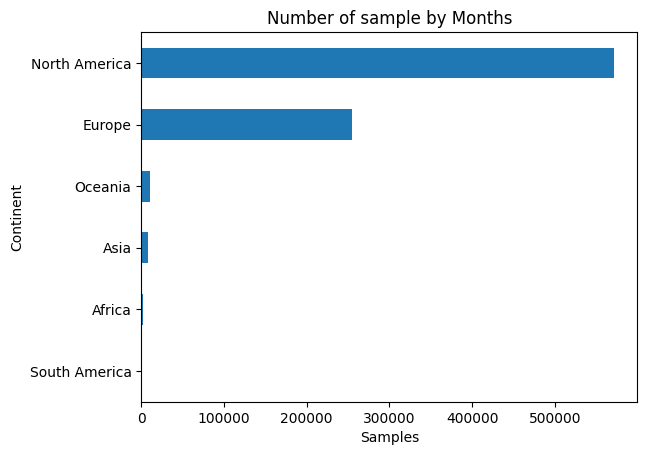

In [13]:
import matplotlib.pyplot as plt


sequences_by_continent.sort_values().plot(kind="barh")

plt.title("Number of sample by Months")
plt.xlabel("Samples")
plt.ylabel("Continent")

plt.show()

3. How long are the shortest and longest sequences? Look at the outliers, if any, to estimate their representation.

In [14]:
print(f"The shortest sequence is {metadata["Nucleotide Length"].min()} and the longest one is {metadata["Nucleotide Length"].max()}")

The shortest sequence is 2859 and the longest one is 30018


4. How many samples were collected by month? Are there any trends?

In [15]:
metadata["Month"] = metadata["Collection Date"].dt.month
metadata["Month"] = metadata["Month"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Maj", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

samples_by_month = metadata.groupby("Month").count()

In [16]:
samples_by_month["Species Name"].sort_values(ascending=False)

Month
Dec    166663
Jan    159594
Nov    131534
Apr     82710
Mar     61238
Maj     46338
Feb     45399
Oct     38341
Jul     33896
Jun     30500
Sep     28268
Aug     23114
Name: Species Name, dtype: int64

In [17]:
order_by_month = samples_by_month["Species Name"].reindex(index=["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

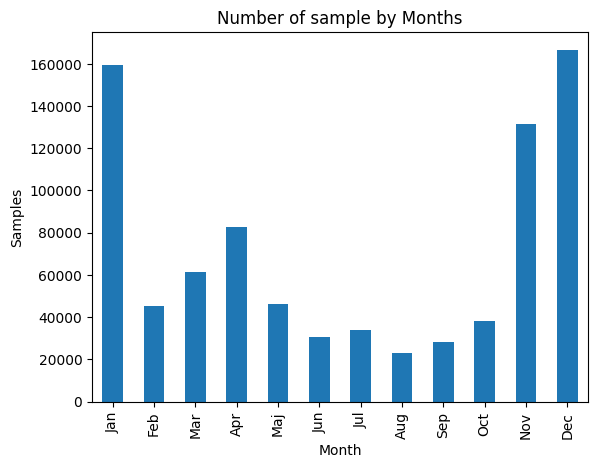

In [18]:
order_by_month.plot(kind="bar")

plt.title("Number of sample by Months")
plt.ylabel("Samples")

plt.show()

According to the aggregated data and the diagram, we can see that in mainly winter months there is a higher number of samples. It coincides with the time of respiratory infectious diseases.

### Identifying Sequences to Download

Now I am going to identify some sequences based on the following ones:
- The `reference` sequence: the first COVID genome that was fully sequenced.
- A `base` sequence: for example, the first sequence for North America.
- One of the `Delta` sequences (one of the most common COVID variants).
- One of the `Omicron` sequences (another common COVID variant).

In [19]:
# Detecting the above-listed COVID sequences in the metadata

reference = metadata[metadata["Sequence Type"] == "RefSeq"]
base = metadata[metadata["Continent"] == "North America"].sort_values("Collection Date").head(1)
delta = metadata[metadata["Isolate Name"].fillna("NA").str.contains("delta", case=False)].head(1) # contains method doesn't work with N/A values
omicron = metadata[metadata["Isolate Name"].fillna("NA").str.contains("omicron", case=False)].head(1)

In [20]:
# Pulling out their metadata as a new pandas DataFrame.

sequences = pd.concat([reference, base, delta, omicron], ignore_index=True, axis=0)

In [21]:
sequences

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia,Dec
1,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America,Jan
2,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia,Aug
3,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia,Dec


### Downloading the Sequences

Next, I am going to download the actual nucleotide sequence for each of the selected COVID RNA sequences. For this, I will use a Python library called `Biopython`

In [22]:
from Bio import Entrez
from dotenv import load_dotenv
import os
import time

In [23]:
# Setting email for web request from NCBI with environment variable to hidding address

load_dotenv()
Entrez.email = os.getenv("EMAIL")

In [24]:
def download_sequence(accession_number):
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text") # web request
    sequence_data = handle.read()
    handle.close()

    return sequence_data # the actual nucleotide sequence

In [25]:
sequence_data = {}
index = ["reference", "base", "delta", "omicron"]

print("Downloading data...")

counter = 0
for i, sequence in zip(index, sequences.values.tolist()):
    ID = sequence[0] # First column is the Accession ID
    sequence_data[i] = download_sequence(ID)
    counter += 1
    print(f"({counter}/{sequences.shape[0]}) downloaded")
    time.sleep(0.4) # Only 3 queries per second are allowed without API key

print("Completed")

(1/4) downloaded
(2/4) downloaded
(3/4) downloaded
(4/4) downloaded
Completed


### Parsing RNA Sequence

I will extract the actual genomic sequence from Fasta format into a more readable format for further analysis.

In [26]:
from Bio import SeqIO
import io

In [27]:
# Iterating over the sequences that identified earlier and creating a file object then parsing it into a readable format

for sequence_type in sequence_data.keys():
    filename = f"./sequence_files/{sequence_type}.fasta"
    
    with open(filename, "w") as file:
        file.write(sequence_data[sequence_type])

    record = list(SeqIO.parse(filename, "fasta"))

    sequence_data[sequence_type] = record # Changing the Fasta format to a list that contains the ID, Description and Sequence in the dictionary

In [28]:
sequence_data # Checking the new structure of dictionary

{'reference': [SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])],
 'base': [SeqRecord(seq=Seq('ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...TAG'), id='OL467832.1', name='OL467832.1', description='OL467832.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_652092_2020/2020, complete genome', dbxrefs=[])],
 'delta': [SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='OM108163.1', name='OM108163.1', description='OM108163.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Delta-3/2021, complete genome', dbxrefs=[])],
 'omicron': [SeqRecord(seq=Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG...AGC'), id='OM095411.1', name='OM095411.1', description='OM095411.1 Sever

### Aligning RNA Sequences

I need to determine the difference between the sequences. For this purpose, I'm going to use an alignment algorithm from `Biopython`, calculate the alignment score between the sequences, and draw conclusions about the difference between them.

In [29]:
from Bio import Align

In [30]:
aligner = Align.PairwiseAligner(match_score=1.0) # 1 point for matching pairs

In [31]:
reference_sequence = str(sequence_data["reference"][0].seq)
target_sequences = ["base", "delta", "omicron"]

print("The alignment score (number of matching) between reference sequence and\n")
for target in target_sequences:
    score = aligner.score(reference_sequence, str(sequence_data[target][0].seq))
    ratio = round((score / len(reference_sequence)) * 100, 2)
    
    print(f"{target} is: {score} ({ratio}% matching)")

The alignment score (number of matching) between reference sequence and

base is: 29820.0 (99.72% matching)
delta is: 29820.0 (99.72% matching)
omicron is: 29725.0 (99.4% matching)


As we can see both the base sequence and variant Delta are matching with reference one in 99,72% but there are further mutation in variant Omicron.

### Checking Alignment Across Variants

Now, I will compare them in pairwise.

In [32]:
import numpy as np

In [35]:
comparison_matrix = np.zeros((4, 4))

In [36]:
comparison_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [44]:
variant_names = ["reference", "base", "delta", "omicron"]

for x in range(4):
    for y in range(4):
        target = str(sequence_data[variant_names[x]][0].seq)
        query =  str(sequence_data[variant_names[y]][0].seq)
        
        comparison_matrix[x][y] = aligner.score(target, query)

In [45]:
comparison_matrix # This matrix contains the alignment scores across pairwise.

array([[29903., 29820., 29820., 29725.],
       [29820., 29831., 29775., 29722.],
       [29820., 29775., 29860., 29690.],
       [29725., 29722., 29690., 29788.]])

In [46]:
variant_scores = pd.DataFrame(comparison_matrix, columns=variant_names, index=variant_names)

In [47]:
variant_scores

,reference,base,delta,omicron
reference,29903.0,29820.0,29820.0,29725.0
base,29820.0,29831.0,29775.0,29722.0
delta,29820.0,29775.0,29860.0,29690.0
omicron,29725.0,29722.0,29690.0,29788.0


We can see a decreasing tendency.